<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Merging-attributes-from-BioSample-using-word2vec" data-toc-modified-id="Merging-attributes-from-BioSample-using-word2vec-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Merging attributes from BioSample using word2vec</a></span></li><li><span><a href="#Set-up" data-toc-modified-id="Set-up-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Set-up</a></span><ul class="toc-item"><li><span><a href="#Import-needed-packages" data-toc-modified-id="Import-needed-packages-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Import needed packages</a></span></li><li><span><a href="#Helper-function-definitions" data-toc-modified-id="Helper-function-definitions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Helper function definitions</a></span></li><li><span><a href="#Load-data-and-embedding-model" data-toc-modified-id="Load-data-and-embedding-model-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Load data and embedding model</a></span></li><li><span><a href="#Build-dataframe-and-subset-human-samples" data-toc-modified-id="Build-dataframe-and-subset-human-samples-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Build dataframe and subset human samples</a></span><ul class="toc-item"><li><span><a href="#Define-attribute-groupings" data-toc-modified-id="Define-attribute-groupings-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Define attribute groupings</a></span></li></ul></li></ul></li><li><span><a href="#Merge-attributes" data-toc-modified-id="Merge-attributes-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Merge attributes</a></span><ul class="toc-item"><li><span><a href="#Calculate-average-embedding-vectors" data-toc-modified-id="Calculate-average-embedding-vectors-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Calculate average embedding vectors</a></span><ul class="toc-item"><li><span><a href="#Randomly-sample-100-of-each-attribute-that-occurs-greater-than-100-times" data-toc-modified-id="Randomly-sample-100-of-each-attribute-that-occurs-greater-than-100-times-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Randomly sample 100 of each attribute that occurs greater than 100 times</a></span></li><li><span><a href="#Get-average-embedding-vector-for-each-attribute" data-toc-modified-id="Get-average-embedding-vector-for-each-attribute-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Get average embedding vector for each attribute</a></span></li></ul></li><li><span><a href="#Merge-entities-with-high-cosine-similarity" data-toc-modified-id="Merge-entities-with-high-cosine-similarity-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Merge entities with high cosine similarity</a></span></li><li><span><a href="#Determine-coverage-increase-with-merging" data-toc-modified-id="Determine-coverage-increase-with-merging-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Determine coverage increase with merging</a></span><ul class="toc-item"><li><span><a href="#Build-dataframe" data-toc-modified-id="Build-dataframe-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Build dataframe</a></span></li><li><span><a href="#Find-coverage-increase" data-toc-modified-id="Find-coverage-increase-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Find coverage increase</a></span></li></ul></li></ul></li></ul></div>

# Merging attributes from BioSample using word2vec
Adam Klie<br>
11/17/2019<br>
Script to create classes as output for neural net using similarities between attribute word embeddings

# Set-up

## Import needed packages

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial as sp
import spacy

/cellar/users/aklie/opt/miniconda3/envs/PredictMEE_new/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/cellar/users/aklie/opt/miniconda3/envs/PredictMEE_new/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
/cellar/users/aklie/opt/miniconda3/envs/PredictMEE_new/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/cellar/users/aklie/opt/miniconda3/envs/PredictMEE_new/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)


In [2]:
from matplotlib import rcParams
import matplotlib as mpl

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 600 
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 18
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'

rcParams['axes.labelsize'] = 30
rcParams['ytick.labelsize'] = 24
rcParams['xtick.labelsize'] = 24

## Helper function definitions

In [3]:
def correlate_dataframes(df1, df2, metric = 'cosine' ):
    M = 1 - sp.distance.cdist(df1, df2, metric)
    return pd.DataFrame(data = M, index = df1.index, columns = df2.index)

## Load data and embedding model

In [4]:
# Load embedding model
nlp = spacy.load('../../data/wikipedia-pubmed-and-PMC-w2v')

In [5]:
# Load attribute-value pairs
qiita_dir = "../../data/qiita/allQiita.pickle"
allQiita = pd.read_pickle(qiita_dir).dropna()

## Build dataframe and subset human samples

In [6]:
host_name_m = allQiita.index.get_level_values(1) == 'host_common_name'
hs_m = allQiita.values == 'human'
human_samples = allQiita[host_name_m & hs_m].index.get_level_values(0)
hsQiita = allQiita[allQiita.index.get_level_values(0).isin(human_samples)]

In [7]:
qiita_df = pd.DataFrame(hsQiita).reset_index()
qiita_df.columns = ['sample_id', 'attribute', 'value']
del allQiita

### Define attribute groupings

In [8]:
grouping = pd.Series({'sex': 'Sex', 
                      'age': 'Age', 
                      'bmi': 'BMI', 
                      'body_site': 'Body site', 
                      'antibiotics': 'Antibiotic usage', 
                      'pregnant': 'Pregnancy status', 
                      'diet': 'Diet type', 
                      'ethnicity': 'Ethnicity'
                     })

In [9]:
model_iter = "qiita"

# Merge attributes

## Calculate average embedding vectors

### Randomly sample 100 of each attribute that occurs greater than 100 times

In [10]:
# Take only attributes with more than 100 samples to compare
qiita_df['value'] = qiita_df['value'].astype(str)
attribute_counts = qiita_df['attribute'].value_counts()
recurr_attrib = attribute_counts.index[attribute_counts > 100]
recurring_df = qiita_df[qiita_df.attribute.isin(recurr_attrib)]
del qiita_df

In [11]:
print("There are %d recurring attributes (greater than 100 samples)" % len(recurr_attrib))

There are 4365 recurring attributes (greater than 100 samples)


In [12]:
# Randomly sample 100 per entities for generating entity vector
recurring_df = recurring_df.sample(recurring_df.shape[0])
subset_df = recurring_df.groupby('attribute').head(n = 100)
del recurring_df

### Get average embedding vector for each attribute

In [13]:
# Get vector representation for all attribute-value pairs randomly selected
docs = nlp.pipe(subset_df['value'].tolist())
subset_df['value'] = subset_df['value'].astype(str)
subset_index = subset_df.set_index(['sample_id','attribute','value']).index
del subset_df
vectors = [doc.vector for doc in docs]
del docs
doc_vector_df = pd.DataFrame(vectors, index=subset_index).astype(float)

In [14]:
# Take average of each attribute and correlate them by cosine similarity
attribute_means = doc_vector_df.groupby('attribute').mean()
embedding_df = attribute_means[attribute_means.sum(axis=1).abs()>0]
corr_df = correlate_dataframes(embedding_df, embedding_df)

Text(0.5,1,'Distribution of cosine similarities of attributes')

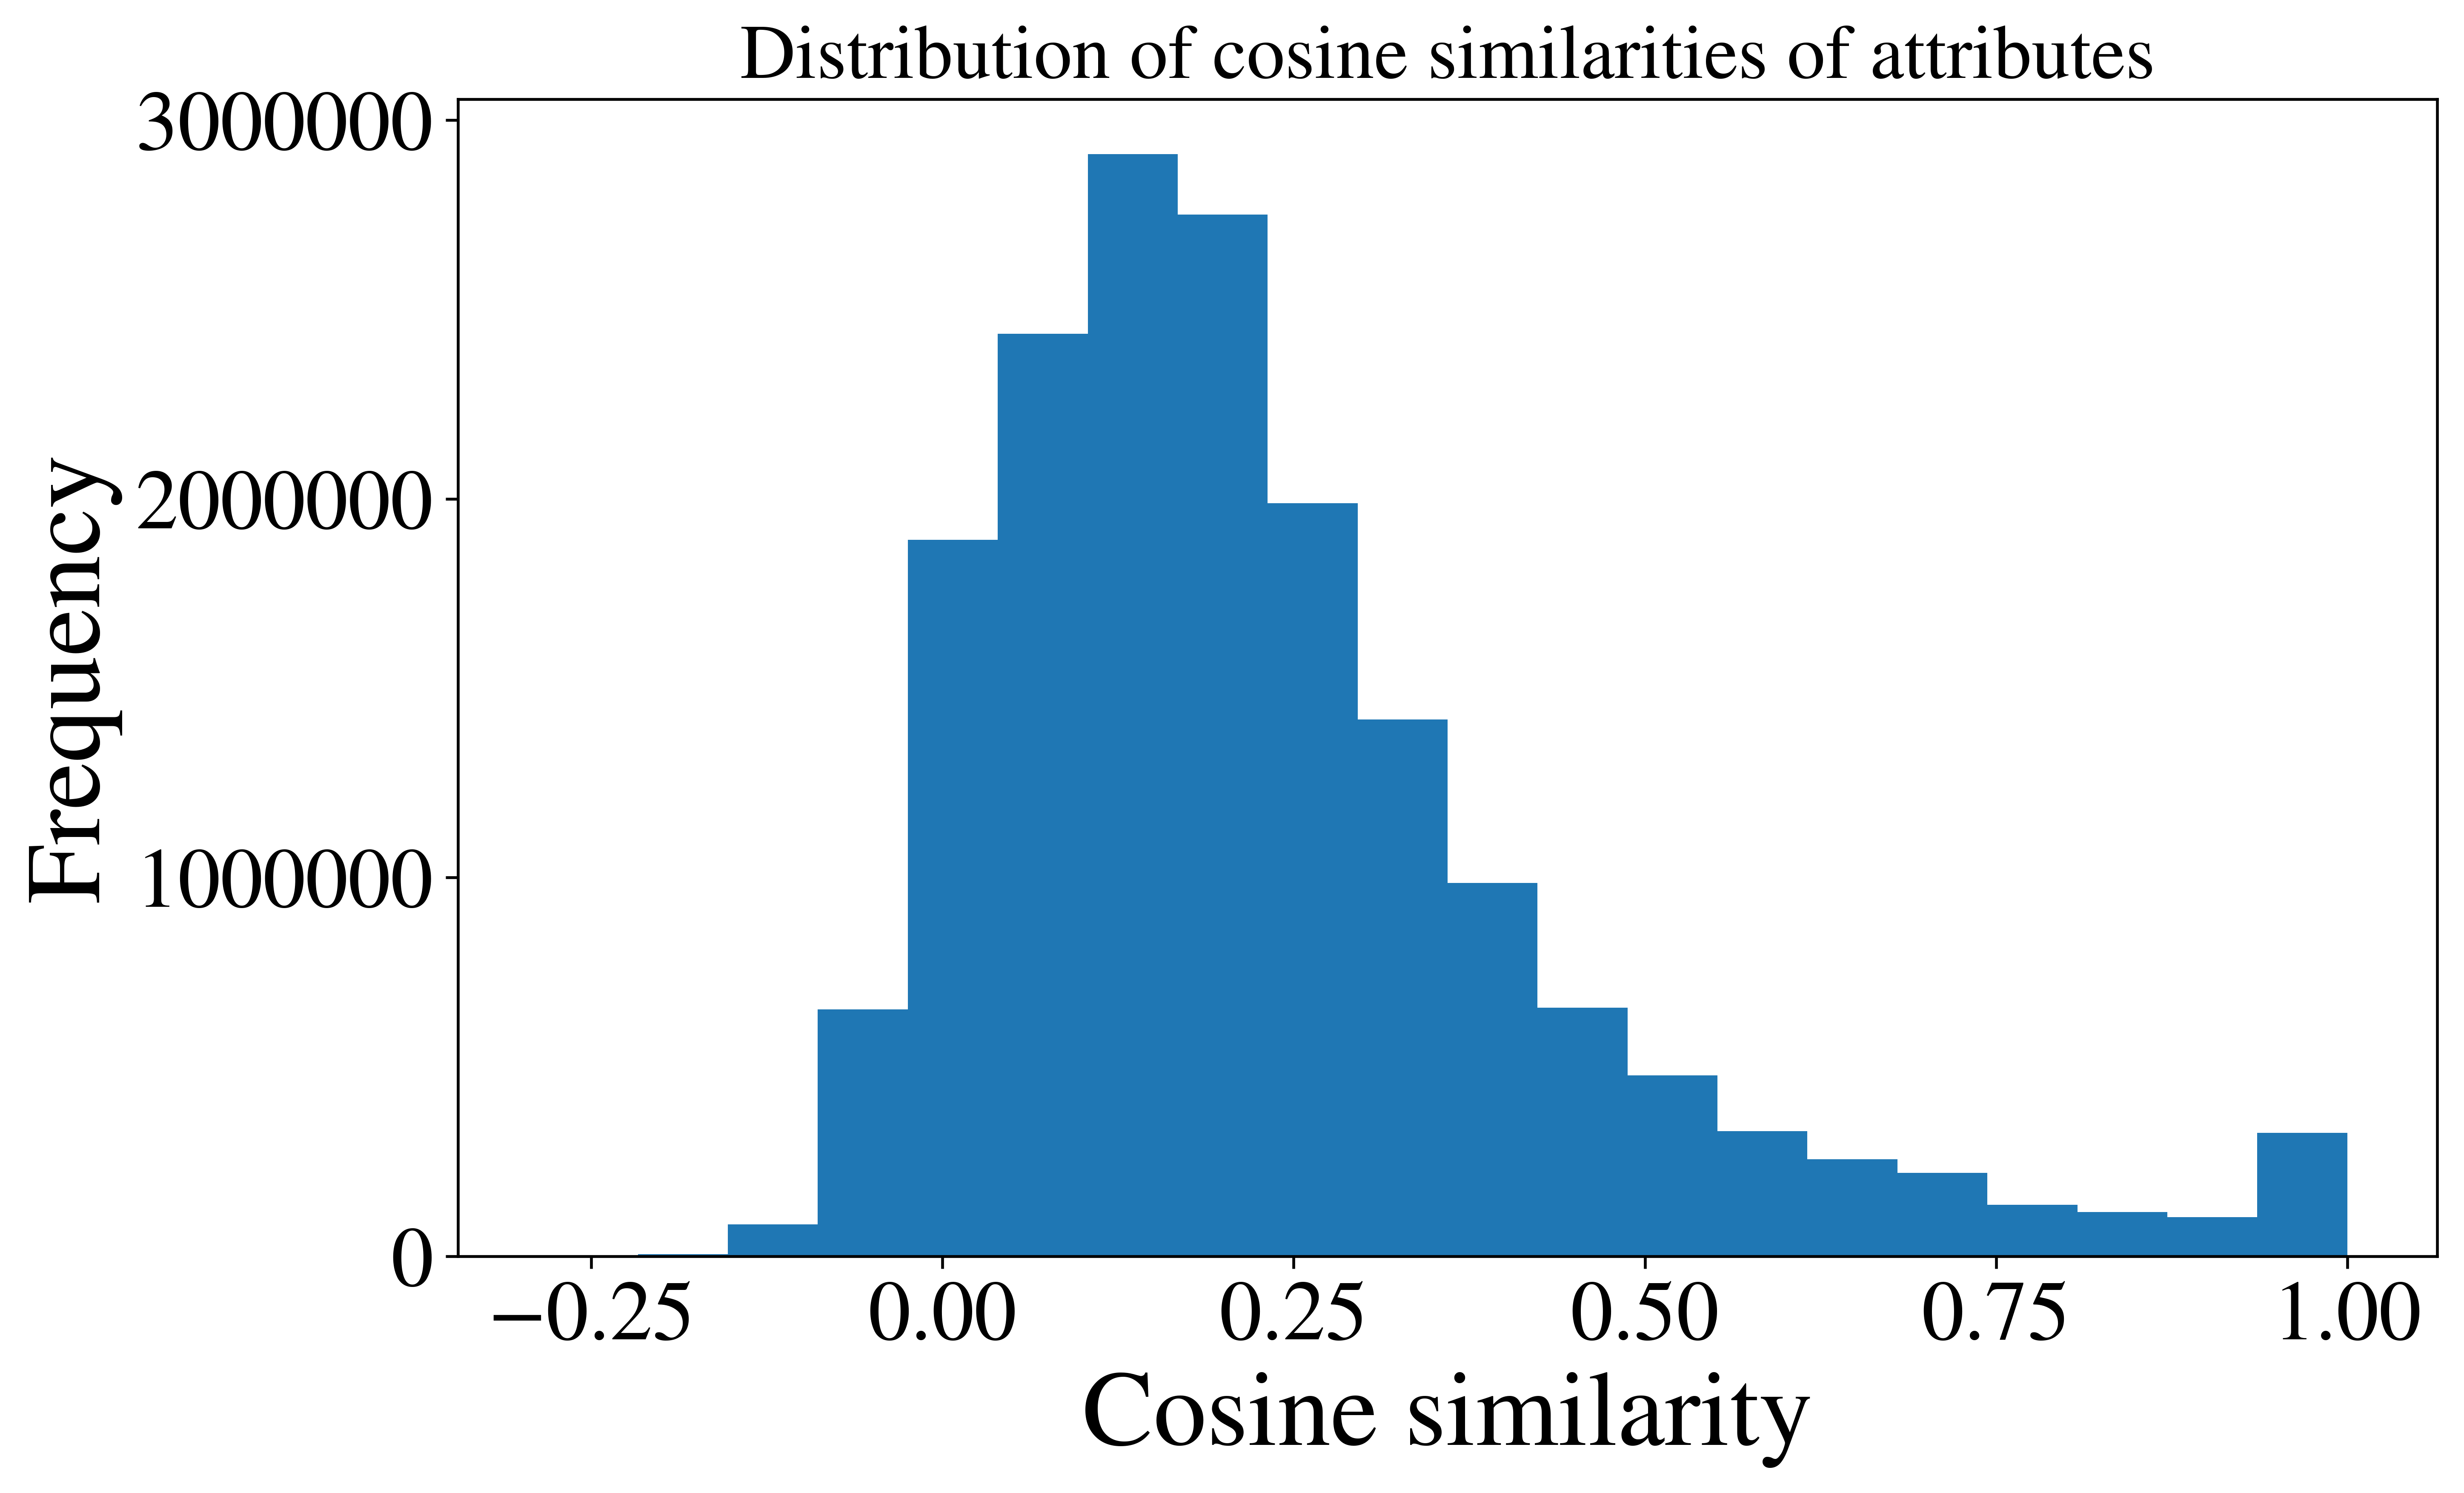

In [15]:
plt.hist(corr_df.unstack().dropna(), bins = 20)
plt.xlabel("Cosine similarity")
plt.ylabel('Frequency')
plt.title('Distribution of cosine similarities of attributes')

## Merge entities with high cosine similarity

In [16]:
# Choose higher categories that will encompass merged attributes
similarity_threshold = 0.8
selected_seeds = grouping.index

In [17]:
# Find all attributes closest to the seed attributes by threshold
dataframe_list = []
for attribute in selected_seeds:
    if attribute == 'age':
        tmp_series = corr_df[attribute][corr_df[attribute].index.isin(['age', 'AGE', 'Age'])]
        tmp_df = tmp_series.sort_values(ascending = False).to_frame().reset_index()
    else:
        tmp_series = corr_df[attribute].sort_values(ascending = False)
        tmp_df = tmp_series[tmp_series>= similarity_threshold].to_frame().reset_index()
    tmp_df.columns = ['attribute','similarity']
    dataframe_list.append(tmp_df)

In [18]:
# Create a dataframe of entities that are similar
merged_df = pd.concat(dataframe_list, keys = selected_seeds, axis = 0)
merged_df.index.names=['GroupName','I']
merged_reset_df = merged_df.reset_index()
similar_df = merged_reset_df[merged_reset_df['similarity'] >= similarity_threshold]
similar_df['GroupName'] = grouping[similar_df['GroupName']].values

In [19]:
similar_df.to_csv('../../results/embedding/{model}/entity_merging.csv'.format(model = model_iter))
similar_df.to_csv('../../doc/figures/CMI/Figure3D.csv'.format(model=model_iter))

## Determine coverage increase with merging

### Build dataframe

In [20]:
# Load attribute-value pairs
qiita_dir = "../../data/qiita/allQiita.pickle"
allQiita = pd.read_pickle(qiita_dir).dropna()

In [21]:
qiita_df = pd.DataFrame(allQiita).reset_index()
qiita_df.columns = ['sample_id', 'attribute', 'value']
del allQiita

### Find coverage increase

In [22]:
similar_df['value count'] = qiita_df['attribute'].value_counts()[similar_df['attribute'].values].values

In [23]:
counts_df = similar_df[similar_df['attribute'].isin(['sex', 'age', 'bmi', 'body_site', 'antibiotics',
                                                     'pregnant', 'diet', 'ethnicity'])].sort_values('GroupName').drop('I', axis = 1)
counts_df = counts_df.drop_duplicates('GroupName')
counts_df['merged count'] = similar_df.groupby('GroupName').sum()['value count'].values
counts_df['factor of increase'] = counts_df['merged count']/counts_df['value count']

In [24]:
display(counts_df)

,GroupName,attribute,similarity,value count,merged count,factor of increase
5,Age,age,1.0,70302,70302,1.000000
161,Antibiotic usage,antibiotics,1.0,19749,339790,17.205428
6,BMI,bmi,1.0,68667,1488498,21.677050
154,Body site,body_site,1.0,126165,747975,5.928546
494,Diet type,diet,1.0,33458,33458,1.000000
495,Ethnicity,ethnicity,1.0,8663,8663,1.000000
447,Pregnancy status,pregnant,1.0,42583,1617452,37.983515
0,Sex,sex,1.0,197705,215701,1.091025


In [25]:
counts_df.to_csv('../../results/embedding/{model}/entity_coverage.csv'.format(model=model_iter))
counts_df.to_csv('../../doc/figures/CMI/coverage_increase.csv'.format(model=model_iter))